In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# task 1
df = pd.read_csv('DS2_C5_S6_AllRent_Data_Challenge.csv')

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
# task 2

df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,1.0,0,cd6e0616a89b2687b8d7b80a1e982ac2,08-04-2016 05:59,58TH! LARGE SPACIOUS STUDIO W/ SEPARATE KITCHE...,East 58th Street,"['Pre-War', 'Dishwasher', 'Hardwood Floors', '...",40.7590,6844961,-73.9621,fc6e39fa6d54cfbc0109950411df29ca,['https://photos.renthop.com/2/6844961_5b045ca...,2000,401 East 58th Street,medium
9867,1.0,2,27e0ae0427a5150191c73831eb901ab0,13-04-2016 15:40,Beautiful Renovated Large True 2 bedrrom apart...,EAST 11 TH ST,"['Cats Allowed', 'Private Outdoor Space', 'Dog...",40.7187,6868922,-73.9919,3e0c28a1f4b9c11b809ff21dbb920b5c,['https://photos.renthop.com/2/6868922_d14a762...,3590,EAST 11 TH ST,medium
9868,1.0,1,d843d07dfbd498625ffd8d9e6078745e,12-05-2016 05:41,Great Deal that won't last!Become a lucky resi...,Amsterdam Avenue,"['Elevator', 'Furnished', 'Laundry in Unit', '...",40.8002,7002179,-73.9656,4c168ba2cf07ab943c98cada6160d2d1,['https://photos.renthop.com/2/7002179_2c2510f...,3000,933 Amsterdam Avenue,medium
9869,1.0,0,b401b080b557697e91b2d19b5a22fac9,21-04-2016 04:56,Stunning West Village apartment available for ...,W 13 Street,"['Elevator', 'Loft', 'Hardwood Floors', 'Dogs ...",40.7383,6906479,-74.0006,4414b04ea8115e64639b64b73737036a,['https://photos.renthop.com/2/6906479_a898cc6...,2525,205 W 13 Street,medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        9871 non-null   float64
 1   bedrooms         9871 non-null   int64  
 2   building_id      9871 non-null   object 
 3   created          9871 non-null   object 
 4   description      9585 non-null   object 
 5   display_address  9837 non-null   object 
 6   features         9871 non-null   object 
 7   latitude         9871 non-null   float64
 8   listing_id       9871 non-null   int64  
 9   longitude        9871 non-null   float64
 10  manager_id       9871 non-null   object 
 11  photos           9871 non-null   object 
 12  price            9871 non-null   int64  
 13  street_address   9866 non-null   object 
 14  interest_level   9871 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.1+ MB


In [6]:
df.shape

(9871, 15)

In [7]:
df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [8]:
df.isnull().sum()

bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

In [9]:
# task 3

for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0], inplace = True)
    if df[i].dtype != 'object':
        df[i].fillna(df[i].mean(), inplace = True)

In [10]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [11]:
df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [13]:
df.corr()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
bathrooms,1.000000,0.528971,0.025727,0.015342,0.015972,-0.001935,-0.023881,0.007422,0.000749,-0.000629,0.020020,-0.010918,0.617426,-0.023595,-0.016047
bedrooms,0.528971,1.000000,0.040990,0.015569,-0.010302,-0.039276,0.008743,0.015035,0.021417,-0.008100,0.003476,0.012428,0.431208,-0.003925,0.025165
building_id,0.025727,0.040990,1.000000,-0.004659,-0.042839,-0.057889,-0.059029,-0.014378,0.005371,0.006890,0.005752,-0.028622,0.023205,0.008176,0.076362
created,0.015342,0.015569,-0.004659,1.000000,-0.000272,0.016529,-0.003088,-0.002082,0.289499,0.006923,0.000276,0.275808,-0.006865,0.013226,0.015524
description,0.015972,-0.010302,-0.042839,-0.000272,1.000000,0.025015,-0.009721,0.001138,-0.021735,-0.004643,-0.028154,-0.118177,0.003635,-0.009056,0.029304
display_address,-0.001935,-0.039276,-0.057889,0.016529,0.025015,1.000000,0.057408,-0.002679,-0.016424,0.007310,-0.047590,0.010951,0.040436,0.057140,-0.007310
features,-0.023881,0.008743,-0.059029,-0.003088,-0.009721,0.057408,1.000000,-0.008677,0.001838,0.016854,-0.027272,0.011199,-0.042215,0.025188,-0.004720
latitude,0.007422,0.015035,-0.014378,-0.002082,0.001138,-0.002679,-0.008677,1.000000,0.012773,-0.967374,-0.010091,0.014216,0.005881,-0.000994,0.001149
listing_id,0.000749,0.021417,0.005371,0.289499,-0.021735,-0.016424,0.001838,0.012773,1.000000,-0.008984,0.009005,0.851734,-0.000628,0.006982,-0.005515
longitude,-0.000629,-0.008100,0.006890,0.006923,-0.004643,0.007310,0.016854,-0.967374,-0.008984,1.000000,0.005067,-0.008770,-0.009305,0.001108,-0.003506


<AxesSubplot:>

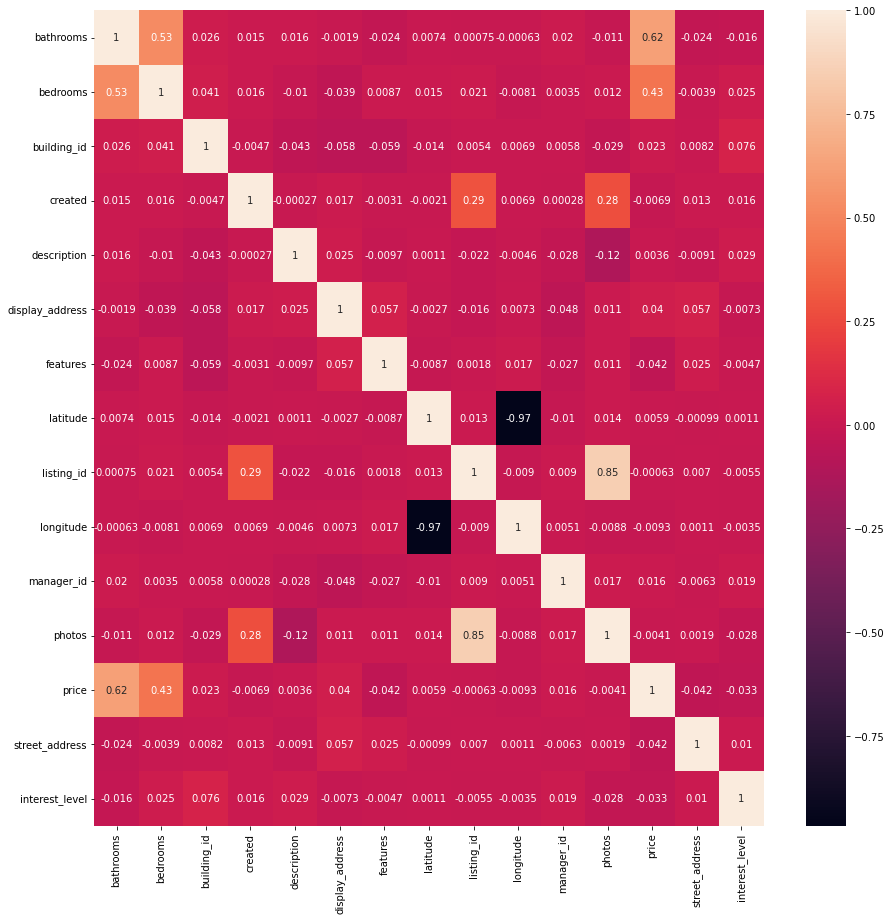

In [14]:
# task 4

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# task 5 and 6

In [15]:
x = df[['bathrooms','bedrooms','created','price']]
y = pd.DataFrame(df['interest_level'])

In [17]:
m = DecisionTreeClassifier() 
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats = 3,random_state=1)
n_score = cross_val_score(m,x,y,scoring = 'f1_weighted',cv = cv, n_jobs=-1, error_score='raise')
print('f1-score', n_score.mean())

f1-score 0.5936376175550885


In [19]:
m = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats = 3,random_state=1 )
n_score = cross_val_score(m,x,y,scoring = 'precision_weighted',cv = cv, n_jobs= -1,error_score= 'raise')
print('f1-score', n_score.mean())

f1-score 0.6035316510265332


In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=1)

In [21]:
rfc = RandomForestClassifier(random_state=1, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=1)

In [22]:
rfc.oob_score_

0.7039007092198581

In [23]:
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]}
grid_search = GridSearchCV (estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [24]:
grid_search.fit(xtrain,ytrain)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [25]:
best = grid_search.best_estimator_
best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=1)

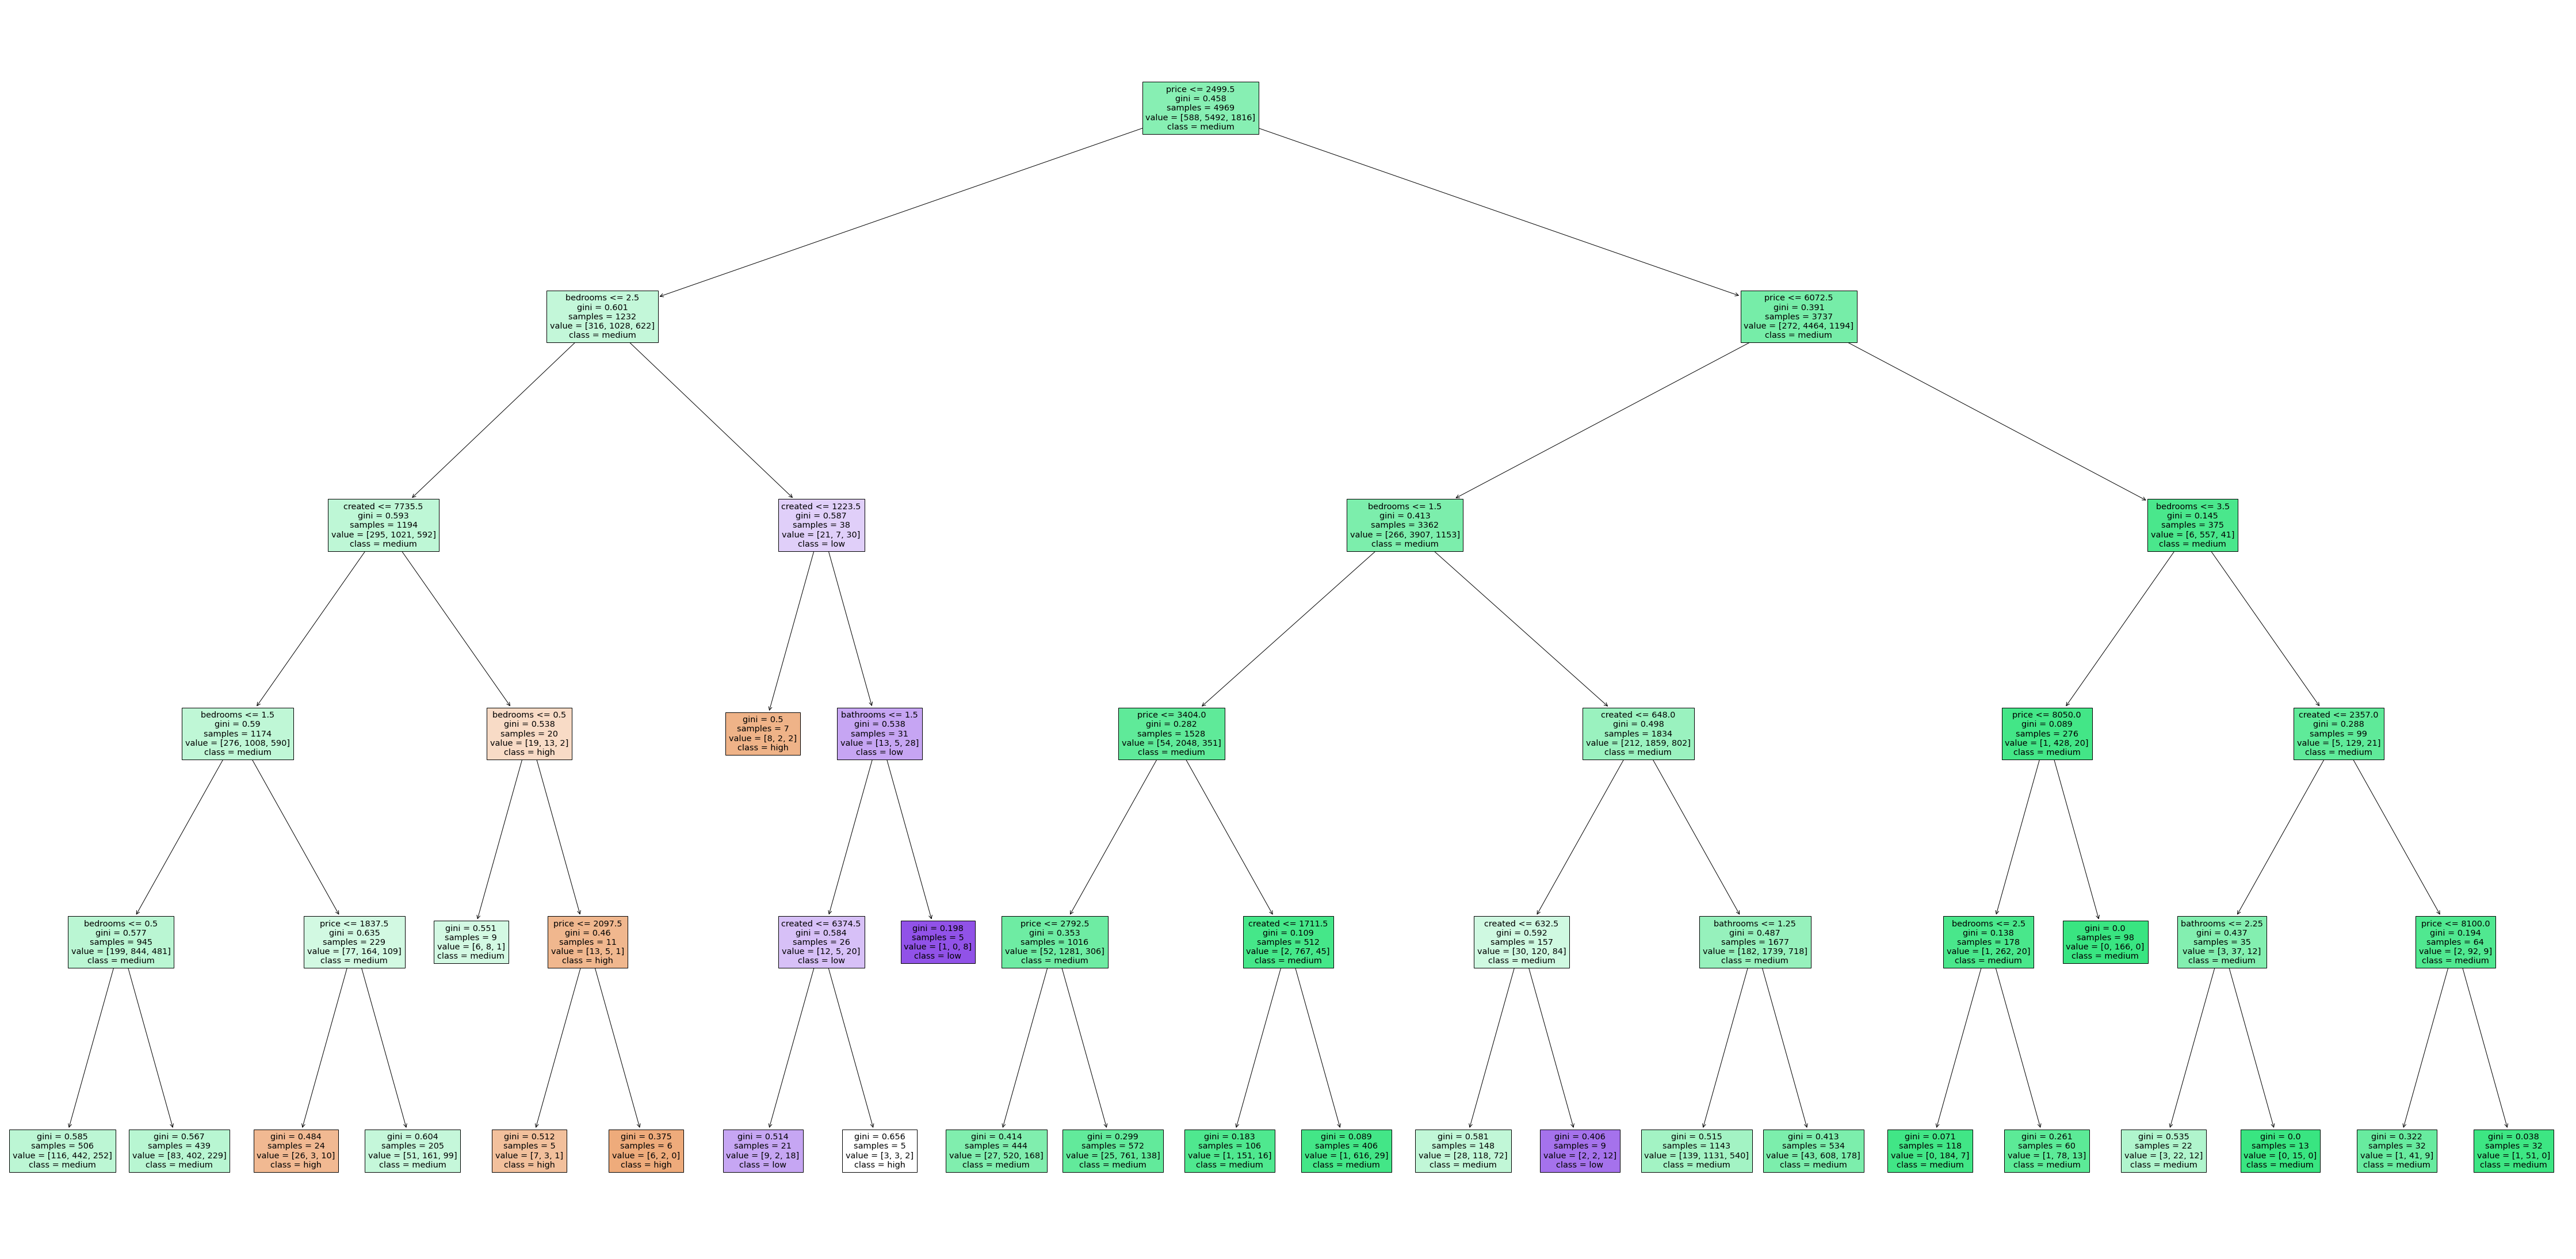

In [26]:
plt.figure(figsize=(80,40))
plot_tree(best.estimators_[7], feature_names = x.columns,class_names=['high','medium','low'],filled=True);